In [42]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Load intake csv and convert to a dataframe
intake_df = pd.read_csv('Resources/Austin_Animal_Center_Intakes.csv')
intake_df.head()

#kaggle datasets download -d aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A801624,NaN,08/06/2019 05:34:00 PM,08/06/2019 05:34:00 PM,5559 Tierra Alta Circle in Travis (TX),Stray,Normal,Cat,Unknown,1 month,Domestic Shorthair,Brown Tabby
1,A801625,NaN,08/06/2019 05:34:00 PM,08/06/2019 05:34:00 PM,5559 Tierra Alta Circle in Travis (TX),Stray,Normal,Cat,Unknown,1 month,Domestic Shorthair,Orange Tabby/White
2,A801628,NaN,08/06/2019 05:03:00 PM,08/06/2019 05:03:00 PM,Ledesma Road And Springdale Road in Austin (TX),Stray,Normal,Dog,Unknown,1 year,Chihuahua Shorthair,Tan
3,A801627,NaN,08/06/2019 05:03:00 PM,08/06/2019 05:03:00 PM,Ledesma Road And Springdale Road in Austin (TX),Stray,Normal,Dog,Unknown,1 year,Dachshund,Brown Brindle
4,A801623,Hermione,08/06/2019 05:02:00 PM,08/06/2019 05:02:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,13 years,Domestic Shorthair,Blue Tabby/White


In [3]:
# Update dataframe with only columns we care about 
intake_df = intake_df[['Animal ID','Name','DateTime','Intake Type','Intake Condition','Animal Type','Age upon Intake','Breed','Color']]
intake_df.head()

,Animal ID,Name,DateTime,Intake Type,Intake Condition,Animal Type,Age upon Intake,Breed,Color
0,A801624,NaN,08/06/2019 05:34:00 PM,Stray,Normal,Cat,1 month,Domestic Shorthair,Brown Tabby
1,A801625,NaN,08/06/2019 05:34:00 PM,Stray,Normal,Cat,1 month,Domestic Shorthair,Orange Tabby/White
2,A801628,NaN,08/06/2019 05:03:00 PM,Stray,Normal,Dog,1 year,Chihuahua Shorthair,Tan
3,A801627,NaN,08/06/2019 05:03:00 PM,Stray,Normal,Dog,1 year,Dachshund,Brown Brindle
4,A801623,Hermione,08/06/2019 05:02:00 PM,Owner Surrender,Normal,Cat,13 years,Domestic Shorthair,Blue Tabby/White


In [4]:
# Rename columns so that they are easier to use in postgres
intake_df = intake_df.rename(columns ={'Animal ID': 'id',
             'Name': 'intake_name',
             'DateTime': 'intake_date',
             'Intake Type': 'intake_type',
             'Intake Condition': 'intake_condition',
             'Animal Type': 'animal_type',
             'Age upon Intake' :'intake_age',
             'Breed': 'breed',
             'Color': 'color'
             })
intake_df.head()

,id,intake_name,intake_date,intake_type,intake_condition,animal_type,intake_age,breed,color
0,A801624,NaN,08/06/2019 05:34:00 PM,Stray,Normal,Cat,1 month,Domestic Shorthair,Brown Tabby
1,A801625,NaN,08/06/2019 05:34:00 PM,Stray,Normal,Cat,1 month,Domestic Shorthair,Orange Tabby/White
2,A801628,NaN,08/06/2019 05:03:00 PM,Stray,Normal,Dog,1 year,Chihuahua Shorthair,Tan
3,A801627,NaN,08/06/2019 05:03:00 PM,Stray,Normal,Dog,1 year,Dachshund,Brown Brindle
4,A801623,Hermione,08/06/2019 05:02:00 PM,Owner Surrender,Normal,Cat,13 years,Domestic Shorthair,Blue Tabby/White


In [5]:
#Rename columns so that they are easier to use in postgres
outcomes_df = pd.read_csv('Resources/Austin_Animal_Center_Outcomes.csv')
outcomes_df.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A801225,NaN,08/06/2019 06:00:00 PM,08/06/2019 06:00:00 PM,05/22/2019,Adoption,NaN,Dog,Spayed Female,2 months,Vizsla,Brown
1,A801491,Blue,08/06/2019 05:58:00 PM,08/06/2019 05:58:00 PM,08/05/2018,Return to Owner,NaN,Dog,Intact Female,1 year,Pit Bull,Blue/White
2,A801345,Cocoa,08/06/2019 05:46:00 PM,08/06/2019 05:46:00 PM,06/02/2019,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair,Tortie
3,A801191,*Starburst,08/06/2019 05:40:00 PM,08/06/2019 05:40:00 PM,05/17/2019,Adoption,NaN,Cat,Spayed Female,2 months,Domestic Shorthair,Calico
4,A800832,*Georgie,08/06/2019 05:36:00 PM,08/06/2019 05:36:00 PM,07/27/2018,Adoption,NaN,Dog,Neutered Male,1 year,Pit Bull Mix,Black Brindle/White


In [6]:
# Update dataframe with columns we care about 
outcomes_df= outcomes_df [['Animal ID','Name','DateTime','Outcome Type','Age upon Outcome']]
outcomes_df.head()

,Animal ID,Name,DateTime,Outcome Type,Age upon Outcome
0,A801225,NaN,08/06/2019 06:00:00 PM,Adoption,2 months
1,A801491,Blue,08/06/2019 05:58:00 PM,Return to Owner,1 year
2,A801345,Cocoa,08/06/2019 05:46:00 PM,Adoption,2 months
3,A801191,*Starburst,08/06/2019 05:40:00 PM,Adoption,2 months
4,A800832,*Georgie,08/06/2019 05:36:00 PM,Adoption,1 year


In [7]:
# Change names of columns so that they are easier to use with postgres
outcomes_df = outcomes_df.rename(columns ={'Animal ID': 'id',
                                         'Name' : 'outcome_name',
                                         'DateTime': 'outcome_date',
                                        'Outcome Type': 'outcome_type',
                                         'Age upon Outcome':'outcome_age'})
outcomes_df.head()

,id,outcome_name,outcome_date,outcome_type,outcome_age
0,A801225,NaN,08/06/2019 06:00:00 PM,Adoption,2 months
1,A801491,Blue,08/06/2019 05:58:00 PM,Return to Owner,1 year
2,A801345,Cocoa,08/06/2019 05:46:00 PM,Adoption,2 months
3,A801191,*Starburst,08/06/2019 05:40:00 PM,Adoption,2 months
4,A800832,*Georgie,08/06/2019 05:36:00 PM,Adoption,1 year


In [10]:
# Connect to local postgres db
rds_connection_string = "postgres:421Monkey!@localhost:5432/Austin_Animal_Shelter_2"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [11]:
# Check that we have connected to appropriate db
engine.table_names()

[]

In [12]:
# Load transformed intake data to postgres
intake_df.to_sql(name = 'intakes', con = engine, if_exists='append', index =False)

In [13]:
# Load transformed outcome data to postgres
outcomes_df.to_sql(name = 'outcomes' , con = engine, if_exists ='append', index = False)

In [14]:
# Convert intake dates to datetime format and get only the date
intake_df['intake_date'] = pd.to_datetime(intake_df['intake_date'])
intake_df['only_date'] = [d.date() for d in intake_df['intake_date']]
# Convert only date to string
intake_df['only_date'] = intake_df['only_date'].astype('str')
# Look for animals that have been in the shelter this year 
intake_2019 = intake_df.loc[intake_df['only_date'] >= '2019-01-01']
intake_2019

,id,intake_name,intake_date,intake_type,intake_condition,animal_type,intake_age,breed,color,only_date
0,A801624,NaN,2019-08-06 17:34:00,Stray,Normal,Cat,1 month,Domestic Shorthair,Brown Tabby,2019-08-06
1,A801625,NaN,2019-08-06 17:34:00,Stray,Normal,Cat,1 month,Domestic Shorthair,Orange Tabby/White,2019-08-06
2,A801628,NaN,2019-08-06 17:03:00,Stray,Normal,Dog,1 year,Chihuahua Shorthair,Tan,2019-08-06
3,A801627,NaN,2019-08-06 17:03:00,Stray,Normal,Dog,1 year,Dachshund,Brown Brindle,2019-08-06
4,A801623,Hermione,2019-08-06 17:02:00,Owner Surrender,Normal,Cat,13 years,Domestic Shorthair,Blue Tabby/White,2019-08-06
5,A801622,Gizmo,2019-08-06 17:02:00,Owner Surrender,Normal,Cat,8 years,Domestic Shorthair,Blue/White,2019-08-06
6,A801621,NaN,2019-08-06 16:50:00,Stray,Normal,Dog,2 years,Miniature Schnauzer,Gray/Black,2019-08-06
7,A801620,NaN,2019-08-06 16:22:00,Stray,Normal,Dog,1 year,Labrador Retriever,Black/White,2019-08-06
8,A801619,Popis,2019-08-06 15:51:00,Owner Surrender,Normal,Dog,1 year,Labrador Retriever,White/Tan,2019-08-06
9,A801618,NaN,2019-08-06 15:45:00,Wildlife,Sick,Other,2 years,Bat,Brown,2019-08-06


In [17]:
# Convert outcome dates to datetime formate and get only the date
outcomes_df['outcome_date'] = pd.to_datetime(outcomes_df['outcome_date'])
outcomes_df['only_date'] = [d.date() for d in outcomes_df['outcome_date']]
#Convert only date to string
outcomes_df['only_date'] = outcomes_df['only_date'].astype('str')
# Look for animals that have left the shelter this year 
outcomes_2019 = outcomes_df.loc[outcomes_df['only_date'] >= '2019-01-01']
outcomes_2019.head()

,id,outcome_name,outcome_date,outcome_type,outcome_age,only_date
0,A801225,NaN,2019-08-06 18:00:00,Adoption,2 months,2019-08-06
1,A801491,Blue,2019-08-06 17:58:00,Return to Owner,1 year,2019-08-06
2,A801345,Cocoa,2019-08-06 17:46:00,Adoption,2 months,2019-08-06
3,A801191,*Starburst,2019-08-06 17:40:00,Adoption,2 months,2019-08-06
4,A800832,*Georgie,2019-08-06 17:36:00,Adoption,1 year,2019-08-06


In [16]:
# Select relevant columns and add to Postgres
intake_2019 = intake_2019[['id','intake_name','intake_date','intake_type','intake_condition','animal_type','intake_age','breed','color']]
outcomes_2019 = outcomes_2019[['id','outcome_name','outcome_date','outcome_type','outcome_age']]
intake_2019.to_sql(name='intakes_2019', con=engine,if_exists='append',index=False)
outcomes_2019.to_sql(name='outcomes_2019', con=engine,if_exists='append',index=False)

In [19]:
# Join data so that there are no duplicate rows 
joined_data = pd.read_sql_query('select distinct i.intake_date,\
     (select min(outcome_date) from outcomes_2019 o where o.id = i.id and outcome_date >= i.intake_date) as outcome_date,\
    i.id, \
    i.intake_name,\
    (select min(outcome_name) from outcomes_2019 o where o.id = i.id) as outcome_name,\
    i.intake_type,\
    i.intake_condition,\
    i.animal_type,\
    i.intake_age,\
    (select min(o.outcome_age) from outcomes_2019 o where o.id = i.id) as outcome_age,\
    i.breed,\
    i.color,\
    (select min(outcome_type) from outcomes_2019 o where o.id = i.id) as outcome_type\
    from \
intakes_2019 i', con=engine)

In [20]:
# Confirm join worked
joined_data.loc[joined_data['id'] == 'A800832']

,intake_date,outcome_date,id,intake_name,outcome_name,intake_type,intake_condition,animal_type,intake_age,outcome_age,breed,color,outcome_type
11383,2019-07-27 14:02:00,2019-08-06 17:36:00,A800832,*Georgie,*Georgie,Stray,Normal,Dog,1 year,1 year,Pit Bull Mix,Black Brindle/White,Adoption


In [53]:
bymontyr = pd.read_sql_query("select substring(intake_date, 7,7) as YrMO,\
	animal_type,\
	count(*) intakes \
from intakes \
group by substring(intake_date, 7, 7),\
	animal_type \
	order by substring(intake_date, 7,7)", con=engine)
bymontyr.head()

,yrmo,animal_type,intakes
0,2013 01,Bird,2
1,2013 01,Cat,136
2,2013 01,Dog,331
3,2013 01,Other,23
4,2013 02,Cat,159


In [54]:
by_YrMo = bymontyr.set_index('yrmo')
by_YrMo.head()

,animal_type,intakes
yrmo,,
2013 01,Bird,2
2013 01,Cat,136
2013 01,Dog,331
2013 01,Other,23
2013 02,Cat,159


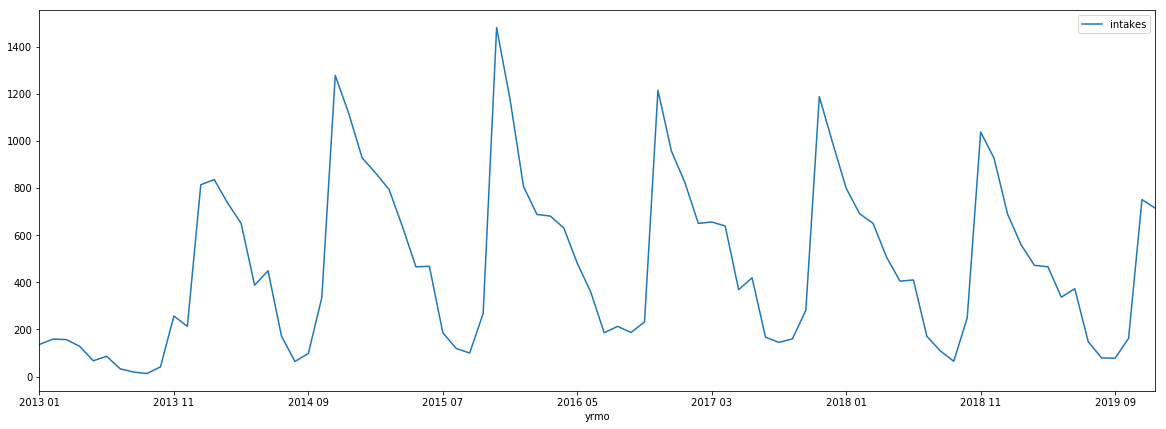

In [48]:
by_YrMo.plot.line( legend = True, figsize = (20,7))

<Figure size 12960x720 with 0 Axes>

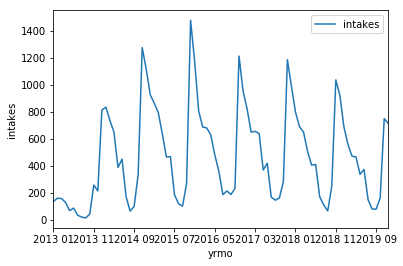

<Figure size 12960x720 with 0 Axes>

In [43]:
by_YrMo.plot(x ='yrmo', y = 'intakes')
plt.ylabel('intakes')
plt.xlabel('yrmo')
plt.figure(figsize=(180,10))